<a href="https://colab.research.google.com/github/yiit8/Creating-Animation-with-OpenCv/blob/main/Pizza-Not%20Pizza%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yigitgun","key":"ebf933a5306c1641041ee1e635f3d4f7"}'}

In [10]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle datasets download "carlosrunner/pizza-not-pizza"

pizza-not-pizza.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip "/content/pizza-not-pizza.zip" -d "/content/pizza-not-pizza"

Archive:  /content/pizza-not-pizza.zip
replace /content/pizza-not-pizza/pizza_not_pizza/food101_subset.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [12]:
from __future__ import print_function, division

import torch
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from sklearn.model_selection import train_test_split
from PIL import Image

cudnn.benchmark = True
plt.ion()   # interactive mode

In [6]:
data_dir = "/content/pizza-not-pizza/pizza_not_pizza"

classes = ['not_pizza','pizza']

num_class = len(classes)

image_files = [[os.path.join(data_dir, class_name, x) 
               for x in os.listdir(os.path.join(data_dir, class_name))] 
               for class_name in classes]




In [7]:
image_file_list = []
image_label_list = []
for i, class_name in enumerate(classes):
    image_file_list.extend(image_files[i])
    image_label_list.extend([i] * len(image_files[i]))
num_total = len(image_label_list)



In [8]:
image_width, image_height = Image.open(image_file_list[0]).size

print('Total image count:', num_total)
print("Image dimensions:", image_width, "x", image_height)
print("Label names:", classes)
print("Label counts:", [len(image_files[i]) for i in range(num_class)])

Total image count: 1966
Image dimensions: 512 x 512
Label names: ['not_pizza', 'pizza']
Label counts: [983, 983]


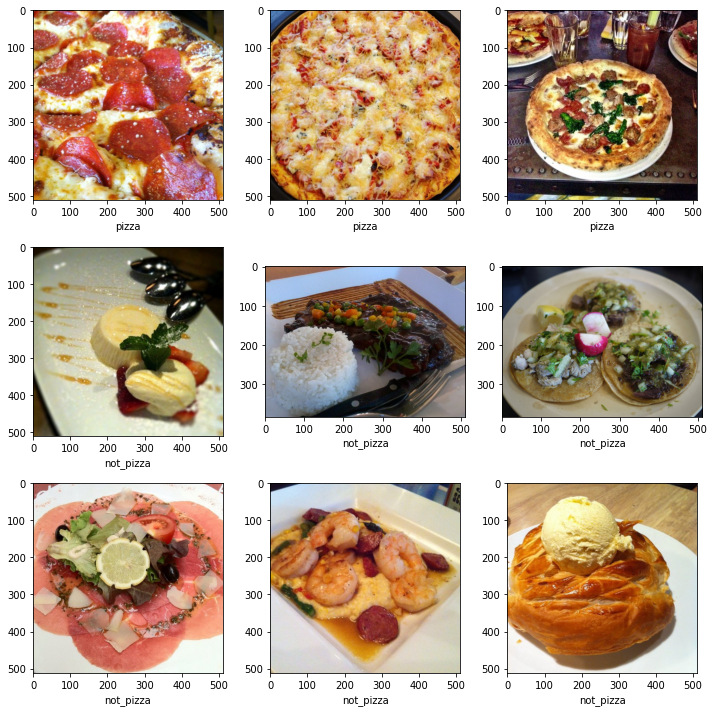

In [9]:
plt.subplots(3,3, figsize=(10,10))
for i,k in enumerate(np.random.randint(num_total, size=9)):
    im = Image.open(image_file_list[k])
    arr = np.array(im)
    plt.subplot(3,3, i+1)
    plt.xlabel(classes[image_label_list[k]])
    plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.tight_layout()
plt.show()

In [ ]:
# Splitting train - val - test (60 - 20 - 20)
valid_frac, test_frac = 0.2, 0.2
trainX,trainY = [],[]
valX,valY = [],[]
testX,testY = [],[]

for i in range(num_total):
    rann = np.random.random()
    if rann < valid_frac:
        valX.append(image_file_list[i])
        valY.append(image_label_list[i])
    elif rann < test_frac + valid_frac:
        testX.append(image_file_list[i])
        testY.append(image_label_list[i])
    else:
        trainX.append(image_file_list[i])
        trainY.append(image_label_list[i])

print(len(trainX),len(valX),len(testX))